In [136]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [137]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [138]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [139]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [140]:
data.head(10)

,polarity,id,date,query,user,text
1040439,4,1956951843,Thu May 28 23:06:46 PDT 2009,NO_QUERY,Cynnergies,@SirReigns Thanks for that shout! #ff Hope all...
496050,0,2185433522,Mon Jun 15 17:22:31 PDT 2009,NO_QUERY,monica_mayhem87,My tummy hurts
703068,0,2255591814,Sat Jun 20 11:29:42 PDT 2009,NO_QUERY,Smaila123,Not happy that they went to go see dane cook w...
200692,0,1971727378,Sat May 30 07:45:51 PDT 2009,NO_QUERY,JessicaJonquil,My Saturday's are always boring.
577726,0,2212730281,Wed Jun 17 14:27:54 PDT 2009,NO_QUERY,carlaraesims,boo. probably won't get in to see small towns ...
1041799,4,1957123925,Thu May 28 23:35:05 PDT 2009,NO_QUERY,itsMISTERgreg,FOUR more days until my vacation from work! I ...
185346,0,1967960064,Fri May 29 20:31:09 PDT 2009,NO_QUERY,Jezzikuhh,sunburn still huts haden needs to be here
92463,0,1760043121,Sun May 10 20:31:58 PDT 2009,NO_QUERY,YourBoyNextDoor,2 sessions at the gym tomorrow...i cheated on ...
698664,0,2254202960,Sat Jun 20 09:23:13 PDT 2009,NO_QUERY,farazalli,"Actually, due to technical difficulties, TBOTW..."
726969,0,2262708278,Sat Jun 20 23:03:56 PDT 2009,NO_QUERY,tiffanybellamy,@_MAXWELL_ im following every step of the tour...


In [141]:
data['polarity'].unique()

array([4, 0])

In [142]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1040439,1,1956951843,Thu May 28 23:06:46 PDT 2009,NO_QUERY,Cynnergies,@SirReigns Thanks for that shout! #ff Hope all...
496050,0,2185433522,Mon Jun 15 17:22:31 PDT 2009,NO_QUERY,monica_mayhem87,My tummy hurts
703068,0,2255591814,Sat Jun 20 11:29:42 PDT 2009,NO_QUERY,Smaila123,Not happy that they went to go see dane cook w...
200692,0,1971727378,Sat May 30 07:45:51 PDT 2009,NO_QUERY,JessicaJonquil,My Saturday's are always boring.
577726,0,2212730281,Wed Jun 17 14:27:54 PDT 2009,NO_QUERY,carlaraesims,boo. probably won't get in to see small towns ...


In [143]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.497250,2.000577e+09
std,0.500005,1.921439e+08
min,0.000000,1.467824e+09
25%,0.000000,1.957661e+09
50%,0.000000,2.001911e+09
75%,1.000000,2.177559e+09
max,1.000000,2.329149e+09


In [144]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  9945
No. of negative tagged sentences is: 10055


In [145]:
# get a word count per of text
def word_count(words):
    return len(words.split())

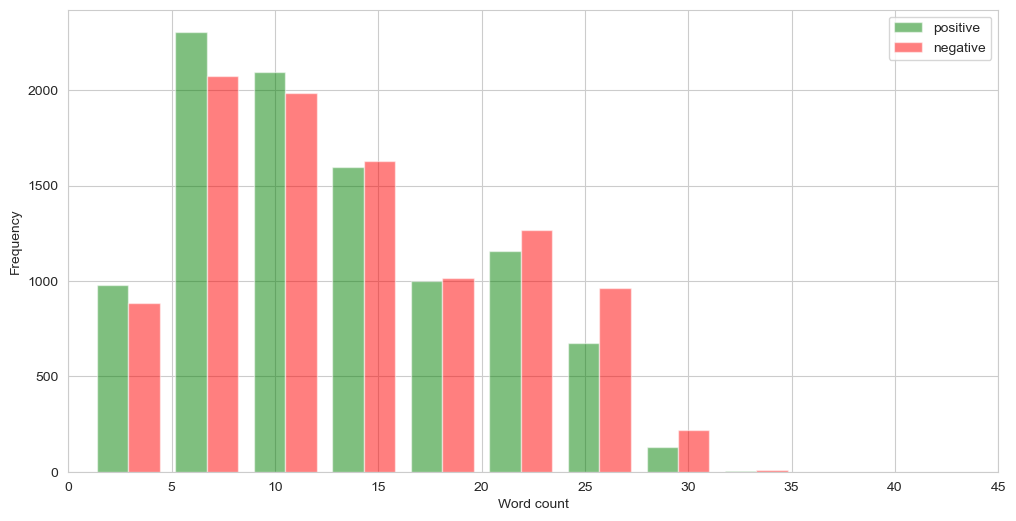

In [146]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [147]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6553),
 ('and', 3741),
 ('you', 2887),
 ('for', 2681),
 ('have', 1760),
 ('but', 1661),
 ('that', 1608),
 ("i'm", 1543),
 ('just', 1528),
 ('with', 1424),
 ('was', 1314),
 ('not', 1269),
 ('this', 1087),
 ('good', 1000),
 ('get', 998),
 ('all', 957),
 ('like', 943),
 ('are', 925),
 ('out', 881),
 ('now', 827)]

<Axes: xlabel='polarity', ylabel='count'>

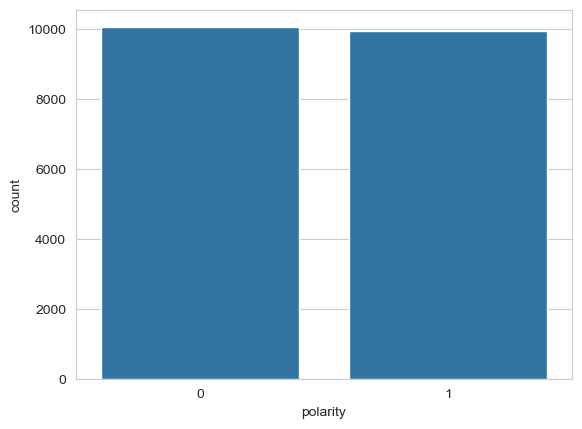

In [148]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [149]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [150]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
1040439,1,@SirReigns Thanks for that shout! #ff Hope all...
496050,0,My tummy hurts
703068,0,Not happy that they went to go see dane cook w...
200692,0,My Saturday's are always boring.
577726,0,boo. probably won't get in to see small towns ...
1041799,1,FOUR more days until my vacation from work! I ...
185346,0,sunburn still huts haden needs to be here
92463,0,2 sessions at the gym tomorrow...i cheated on ...
698664,0,"Actually, due to technical difficulties, TBOTW..."
726969,0,@_MAXWELL_ im following every step of the tour...


In [151]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [152]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [153]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'in', "wouldn't", "they'd", 'out', 'her', 'd', 'them', 'over', 'by', 'down', 'if', 'a', "didn't", "they've", 'does', "shouldn't", 'doesn', "it's", "she'd", 'ma', "she'll", 'only', "we've", 'will', "mustn't", 'mightn', "i've", "you're", 'itself', 'needn', 'more', 'most', 'are', 'below', "you'll", 'at', 'so', "he's", "won't", 'then', "isn't", 'its', 'while', 'these', "we're", "you'd", 'before', 'do', 'shouldn', 'theirs', 'being', "we'd", 'been', 've', 'it', 'the', 'won', 'yourselves', 'own', 'mustn', 'for', 'hers', 'o', 'such', 'm', 'you', 'both', 'haven', 'which', 'your', "couldn't", 'as', 'have', 'an', 'here', 'that', 'who', 'don', 'when', "doesn't", 'of', 'should', 'can', 'had', 'because', 'y', 'me', 'those', 'is', 'and', 't', 'under', "i'm", 'other', 'how', 'yours', 'll', 'very', "you've", 'again', 'having', 'hasn', "i'd", 'am', 'weren', 'ours', 'we', "don't", 're', 'myself', "that'll", 'into', 'what', 'themselves', 'some', 'once', 'all', "hadn't", 'through', 'further', 'his', 'agai

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [155]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets_self1(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

def process_tweets_self2(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    negation_words = {"no", "nor", "not", "don", "don't", "didn", "didn't", "doesn", "doesn't", "can't", "cannot", "won't", "wouldn", "wouldn't", "shouldn", "shouldn't", "isn't", "aren't", "wasn't", "weren't"}

    # Remove negation words from the stop word list
    custom_stop_words = stopword.difference(negation_words)
    final_tokens = [w for w in tokens if w not in custom_stop_words]
    #final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

def process_tweets_origin(tweet):
  # Lower Casing
    tweet = tweet.lower()
    # tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [156]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [157]:
data.head(10)

,polarity,text,processed_tweets
1040439,1,@SirReigns Thanks for that shout! #ff Hope all...,thanks shout ff hope alls well
496050,0,My tummy hurts,tummy hurt
703068,0,Not happy that they went to go see dane cook w...,happy went go see dane cook stinky outside wok...
200692,0,My Saturday's are always boring.,saturday always boring
577726,0,boo. probably won't get in to see small towns ...,boo probably wont get see small town tonight d...
1041799,1,FOUR more days until my vacation from work! I ...,four day vacation work dont care go long im aw...
185346,0,sunburn still huts haden needs to be here,sunburn still hut haden need
92463,0,2 sessions at the gym tomorrow...i cheated on ...,session gym tomorrowi cheated diet badnot real...
698664,0,"Actually, due to technical difficulties, TBOTW...",actually due technical difficulty tbotw isnt p...
726969,0,@_MAXWELL_ im following every step of the tour...,im following every step tour guess way hoping ...


# RNN - LSTM

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

## Converting text data into sequences

In [159]:
max_words = 5000
max_len = 200
embedding_dim = 64
LSTM_units = 32
hidden_units = 8
num_epochs = 10
results = {}
preprocess_methods = {
    "Self1 (Negation Handling)": process_tweets_self1,
    "Self2 (Stopword Filtering)": process_tweets_self2,
    "Original": process_tweets_origin
}

# 1. build word table
# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)

# 2. Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# 3. Pad or truncate all tweet (text) with maximum 'max_len' words
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)
print(tweets.shape)
print("Len word_index:", len(tokenizer.word_index))

[[   0    0    0 ... 1258   43   21]
 [   0    0    0 ...    0  781  136]
 [   0    0    0 ...  317  222   42]
 ...
 [   0    0    0 ... 4435  440   41]
 [   0    0    0 ... 1127    6  297]
 [   0    0    0 ...   10  403 1784]]
(20000, 200)
Len word_index: 21843


## Split Traning and Test data

In [160]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)
print(np.unique(train_label))
print(np.unique(test_label))

[0 1]
[0 1]


## Creating and Traning LSTM Model

In [161]:
for method_name, process_func in preprocess_methods.items():
    print(f"🔍 Running model with preprocessing: {method_name}...")

    # 预处理文本
    data['processed_tweets'] = data['text'].apply(lambda x: process_func(x))

    # Tokenization
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(data.processed_tweets)
    sequences = tokenizer.texts_to_sequences(data.processed_tweets)
    tweets = pad_sequences(sequences, maxlen=max_len)

    # 数据集划分
    train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

    # 构建 LSTM 模型
    model = Sequential([
        Embedding(max_words, embedding_dim),
        LSTM(LSTM_units, dropout=0.5),
        Dense(hidden_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型
    history = model.fit(train_data, train_label, epochs=num_epochs, validation_data=(test_data, test_label), verbose=2)

    # 记录结果
    results[method_name] = {
        'train_acc': history.history['accuracy'],
        'test_acc': history.history['val_accuracy']
    }

🔍 Running model with preprocessing: Self1 (Negation Handling)...
Epoch 1/10
500/500 - 20s - 39ms/step - accuracy: 0.6848 - loss: 0.5852 - val_accuracy: 0.7545 - val_loss: 0.5128
Epoch 2/10
500/500 - 18s - 35ms/step - accuracy: 0.7860 - loss: 0.4574 - val_accuracy: 0.7550 - val_loss: 0.5050
Epoch 3/10
500/500 - 17s - 35ms/step - accuracy: 0.8211 - loss: 0.4079 - val_accuracy: 0.7492 - val_loss: 0.5306
Epoch 4/10
500/500 - 18s - 35ms/step - accuracy: 0.8337 - loss: 0.3784 - val_accuracy: 0.7500 - val_loss: 0.5271
Epoch 5/10
500/500 - 18s - 35ms/step - accuracy: 0.8483 - loss: 0.3472 - val_accuracy: 0.7505 - val_loss: 0.5539
Epoch 6/10
500/500 - 17s - 35ms/step - accuracy: 0.8619 - loss: 0.3211 - val_accuracy: 0.7427 - val_loss: 0.5713
Epoch 7/10
500/500 - 18s - 35ms/step - accuracy: 0.8752 - loss: 0.2874 - val_accuracy: 0.7380 - val_loss: 0.6379
Epoch 8/10
500/500 - 17s - 34ms/step - accuracy: 0.8849 - loss: 0.2683 - val_accuracy: 0.7425 - val_loss: 0.6522
Epoch 9/10
500/500 - 17s - 34ms

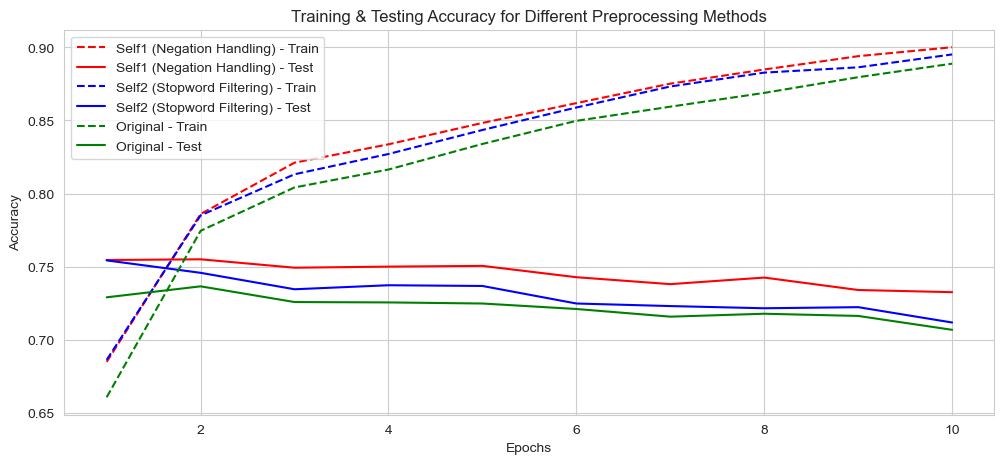

In [162]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(12, 5))
for i, (method_name, res) in enumerate(results.items()):
    plt.plot(range(1, num_epochs + 1), res['train_acc'], linestyle='dashed', color=colors[i], label=f"{method_name} - Train")
    plt.plot(range(1, num_epochs + 1), res['test_acc'], color=colors[i], label=f"{method_name} - Test")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Testing Accuracy for Different Preprocessing Methods")
plt.legend()
plt.show()

## Test the Model

In [163]:
def testModel(model, text):
    # model = keras.models.load_model('rnn_model.keras')
    sequence = tokenizer.texts_to_sequences([text])
    test = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(test)
    pred_value = pred[0][0]
    print(f'Prediction: {pred_value * 100:.2f}%')

    if pred_value > 0.5:
        print('Positive:', text)
    else:
        print('Negative:', text)

In [164]:
testModel(model2,str('this data science article is the worst ever'))
testModel(model2,str('this data science article is the best ever'))
testModel(model2,str('I had a bad day at work.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 1.80%
Negative: this data science article is the worst ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: 1.66%
Negative: this data science article is the best ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 4.39%
Negative: I had a bad day at work.


In [165]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets_test(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

def process_tweets_test_Append(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

In [166]:
def tokenizer(test_text):
    # 1. build word table with top 50 words
    tokenizer = Tokenizer(num_words=8)
    tokenizer.fit_on_texts(test_text)
    print("word table:", tokenizer.word_index)

    sequences = tokenizer.texts_to_sequences(test_text)
    print("test_text sequences:", sequences)

    tweets = pad_sequences(sequences, maxlen=5)
    print(tweets.shape)
    print("test_text pad_sequences:", tweets)

In [167]:
# Test tokenizer
test_text = ["I do not love machine learning",
             "Deep learning is a subset of machine learning",
             "This is an example of padding sequences in NLP"]
test_tweets = [
    "I LOVE this movie!!! It's absolutely amazing!!! #mustwatch",
    "I LOVE this movie!!! It's absolutely amazing!!! #mustwatch",
    "@user123 Thanks for the recommendation! I'll check it out.",
    "Not happy with the service at all. Never coming back!",
    "Not well with the service at all. Never coming back!",
    "Visit our website at https://www.example.com for more details!"
]

processed_test_text = [process_tweets_test(x) for x in test_tweets]
print("processed_test_text:", processed_test_text)
tokenizer(processed_test_text)

processed_test_text: ['love movie absolutely amazing mustwatch', 'love movie absolutely amazing mustwatch', 'user123 thanks recommendation ill check', 'ot happy service never coming back', 'ot well service never coming back', 'isit website detail']
word table: {'love': 1, 'movie': 2, 'absolutely': 3, 'amazing': 4, 'mustwatch': 5, 'ot': 6, 'service': 7, 'never': 8, 'coming': 9, 'back': 10, 'user123': 11, 'thanks': 12, 'recommendation': 13, 'ill': 14, 'check': 15, 'happy': 16, 'well': 17, 'isit': 18, 'website': 19, 'detail': 20}
test_text sequences: [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [], [6, 7], [6, 7], []]
(6, 5)
test_text pad_sequences: [[1 2 3 4 5]
 [1 2 3 4 5]
 [0 0 0 0 0]
 [0 0 0 6 7]
 [0 0 0 6 7]
 [0 0 0 0 0]]


In [168]:
from sklearn.manifold import TSNE
# 提取 `Embedding` 层的权重
embedding_layer = model2.get_layer("embedding_7")  # 确保你的 `Embedding` 层名字是 "embedding"
embedding_weights = embedding_layer.get_weights()[0]  # shape: (max_words, embedding_dim)
print("Embedding shape:", embedding_weights.shape)  # 应该是 (max_words, 64) 之类的

# 获取 tokenizer 中的单词索引
word_index = tokenizer.word_index
print("Len word_index:", len(word_index))  # 输出词典大小
reverse_word_index = {v: k for k, v in word_index.items()}  # 反转索引以便获取单词

# 选择词频最高的 200 个单词
selected_words = 200
top_indices = np.array([idx for word, idx in word_index.items() if idx < selected_words + 1])  # 取前 200 词
top_vectors = embedding_weights[top_indices]

# 使用 t-SNE 降维到 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
reduced_vectors = tsne.fit_transform(top_vectors)

# 绘制散点图
plt.figure(figsize=(12, 8))
for i, word_idx in enumerate(top_indices):
    word = reverse_word_index.get(word_idx, "?")  # 获取单词
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], alpha=0.7)
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=10)

plt.title("Word Embeddings Visualization (t-SNE)")
plt.show()

ValueError: No such layer: embedding_7. Existing layers are: ['embedding_2', 'lstm_2', 'dense_4', 'batch_normalization_1', 'dense_5'].